## Generating Data

In [1]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# Base coordinates for sectors
location_coords = {
    "Sector A": (30.021, 31.450),
    "Sector B": (30.023, 31.455),
    "Sector C": (30.027, 31.460),
    "Sector D": (30.031, 31.465),
    "Sector E": (30.035, 31.470)
}

# Complaint types
complaint_types = ["Traffic", "Roads Issues", "Security", "Noise", "Cleaning", "Pets Control"]

# Time patterns for complaints
time_patterns = {
    "Traffic": (7, 9),  # Morning rush
    "Roads Issues": (7, 9),  # Morning rush
    "Security": (19, 5),  # Nighttime
    "Noise": (17, 22),  # Evening
    "Cleaning": (6, 8),  # Early morning
    "Pets Control": (9, 19)  # Daytime
}

# Generate a list of records
def generate_complaint_data(num_records=1000):
    data = []
    start_date = datetime(2023, 1, 1)
    
    for _ in range(num_records):
        # Select complaint type
        complaint = random.choice(complaint_types)
        
        # Set date and time
        complaint_date = start_date + timedelta(days=random.randint(0, 364))
        start_hour, end_hour = time_patterns[complaint]
        
        # Adjust for nighttime range
        if start_hour < end_hour:
            complaint_time = complaint_date.replace(
                hour=random.randint(start_hour, end_hour), minute=random.randint(0, 59))
        else:  # Nighttime complaints, crossing over midnight
            hours = list(range(start_hour, 24)) + list(range(0, end_hour + 1))
            complaint_time = complaint_date.replace(
                hour=random.choice(hours), minute=random.randint(0, 59))

        # Select location and adjust latitude/longitude
        sector = random.choice(list(location_coords.keys()))
        base_lat, base_long = location_coords[sector]
        latitude = base_lat + random.uniform(-0.001, 0.001)
        longitude = base_long + random.uniform(-0.001, 0.001)

        # Append to data list
        data.append({
            "Date": complaint_date.date(),
            "Time": complaint_time.time(),
            "Complaint Type": complaint,
            "Location": sector,
            "Latitude": latitude,
            "Longitude": longitude
        })
    
    # Convert to DataFrame
    return pd.DataFrame(data)

# Generate the data
complaint_data = generate_complaint_data(num_records=100000)
complaint_data.to_csv("data/complaint_data.csv")
print(complaint_data.head())


         Date      Time Complaint Type  Location   Latitude  Longitude
0  2023-01-31  19:40:00          Noise  Sector B  30.023742  31.455983
1  2023-05-02  19:35:00          Noise  Sector C  30.027517  31.459525
2  2023-12-02  22:35:00          Noise  Sector D  30.031793  31.465766
3  2023-05-05  07:41:00       Cleaning  Sector E  30.034402  31.469658
4  2023-02-19  17:29:00          Noise  Sector E  30.034562  31.469012


In [ ]:
## you may need to add times and locations where no complains occurs
import pandas as pd
import random
from datetime import datetime, timedelta

# Base coordinates for sectors and their approximate sizes
location_coords = {
    "Sector A": (30.021, 31.450),
    "Sector B": (30.023, 31.455),
    "Sector C": (30.027, 31.460),
    "Sector D": (30.031, 31.465),
    "Sector E": (30.035, 31.470)
}

# Complaint types
complaint_types = ["Traffic", "Roads Issues", "Security", "Noise", "Cleaning", "Pets Control"]

# Time patterns for complaints
time_patterns = {
    "Traffic": (7, 9),
    "Roads Issues": (7, 9),
    "Security": (19, 5),
    "Noise": (17, 22),
    "Cleaning": (6, 8),
    "Pets Control": (9, 19)
}

# Sub-sector correlation for specific complaints
sub_sector_correlation = {
    "Traffic": [("Sector A", (30.0205, 30.0215), (31.4495, 31.4505)), 
                ("Sector B", (30.0225, 30.0235), (31.4545, 31.4555))],
    "Roads Issues": [("Sector C", (30.0265, 30.0275), (31.4595, 31.4605))],
    "Security": [("Sector D", (30.0305, 30.0315), (31.4645, 31.4655)), 
                 ("Sector E", (30.0345, 30.0355), (31.4695, 31.4705))],
    "Noise": [("Sector C", (30.0265, 30.0275), (31.4595, 31.4605)), 
              ("Sector D", (30.0305, 30.0315), (31.4645, 31.4655))],
    "Cleaning": [("Sector A", (30.0205, 30.0215), (31.4495, 31.4505)), 
                 ("Sector B", (30.0225, 30.0235), (31.4545, 31.4555))],
    "Pets Control": [("Sector D", (30.0305, 30.0315), (31.4645, 31.4655)),
                     ("Sector E", (30.0345, 30.0355), (31.4695, 31.4705))]
}

# Generate a list of records
def generate_complaint_data(num_records=1000):
    data = []
    start_date = datetime(2023, 1, 1)
    
    for _ in range(num_records):
        # Select complaint type
        complaint = random.choice(complaint_types)
        
        # Select a correlated sub-sector based on complaint type
        sector, lat_range, long_range = random.choice(sub_sector_correlation[complaint])
        
        # Randomize within sub-sector boundaries
        latitude = random.uniform(lat_range[0], lat_range[1])
        longitude = random.uniform(long_range[0], long_range[1])
        
        # Set date and time
        complaint_date = start_date + timedelta(days=random.randint(0, 364))
        start_hour, end_hour = time_patterns[complaint]
        
        # Adjust for nighttime range
        if start_hour < end_hour:
            complaint_time = complaint_date.replace(
                hour=random.randint(start_hour, end_hour), minute=random.randint(0, 59))
        else:  # Nighttime complaints, crossing over midnight
            hours = list(range(start_hour, 24)) + list(range(0, end_hour + 1))
            complaint_time = complaint_date.replace(
                hour=random.choice(hours), minute=random.randint(0, 59))

        # Append to data list
        data.append({
            "Date": complaint_date.date(),
            "Time": complaint_time.time(),
            "Complaint Type": complaint,
            "Location": sector,
            "Latitude": latitude,
            "Longitude": longitude
        })
    
    # Convert to DataFrame
    return pd.DataFrame(data)

# Generate the data
complaint_data = generate_complaint_data(num_records=100000)
complaint_data.to_csv("data/complaint_data.csv", index=False)
print(complaint_data.head())


         Date      Time Complaint Type  Location   Latitude  Longitude
0  2023-12-09  13:15:00   Pets Control  Sector D  30.030950  31.465383
1  2023-11-07  19:39:00   Pets Control  Sector D  30.031208  31.464828
2  2023-01-08  07:25:00        Traffic  Sector B  30.022724  31.454510
3  2023-11-25  12:02:00   Pets Control  Sector D  30.031237  31.465044
4  2023-01-14  20:28:00          Noise  Sector D  30.031300  31.464909


In [7]:
import pandas as pd
import random
from datetime import datetime, timedelta

# Base coordinates for sectors and their approximate sizes
location_coords = {
    "Sector A": (30.021, 31.450),
    "Sector B": (30.023, 31.455),
    "Sector C": (30.027, 31.460),
    "Sector D": (30.031, 31.465),
    "Sector E": (30.035, 31.470)
}

# Complaint types
complaint_types = ["Traffic", "Roads Issues", "Security", "Noise", "Cleaning", "Pets Control"]

# Time patterns for complaints
time_patterns = {
    "Traffic": (7, 9),
    "Roads Issues": (7, 9),
    "Security": (19, 5),
    "Noise": (17, 22),
    "Cleaning": (6, 8),
    "Pets Control": (9, 19)
}

# Sub-sector correlation for specific complaints
sub_sector_correlation = {
    "Traffic": [("Sector A", (30.0205, 30.0215), (31.4495, 31.4505)), 
                ("Sector B", (30.0225, 30.0235), (31.4545, 31.4555))],
    "Roads Issues": [("Sector C", (30.0265, 30.0275), (31.4595, 31.4605))],
    "Security": [("Sector D", (30.0305, 30.0315), (31.4645, 31.4655)), 
                 ("Sector E", (30.0345, 30.0355), (31.4695, 31.4705))],
    "Noise": [("Sector C", (30.0265, 30.0275), (31.4595, 31.4605)), 
              ("Sector D", (30.0305, 30.0315), (31.4645, 31.4655))],
    "Cleaning": [("Sector A", (30.0205, 30.0215), (31.4495, 31.4505)), 
                 ("Sector B", (30.0225, 30.0235), (31.4545, 31.4555))],
    "Pets Control": [("Sector D", (30.0305, 30.0315), (31.4645, 31.4655)),
                     ("Sector E", (30.0345, 30.0355), (31.4695, 31.4705))]
}

def generate_balanced_data(num_complaint_records=10000, no_complaint_ratio=10):
  """
  Generate both complaint and no-complaint records.
  no_complaint_ratio: For each complaint, how many no-complaint records to generate
  """
  data = []
  start_date = datetime(2023, 1, 1)
  
  # Generate complaint records
  complaint_records = []
  for _ in range(num_complaint_records):
      complaint = random.choice(complaint_types)
      sector, lat_range, long_range = random.choice(sub_sector_correlation[complaint])
      latitude = random.uniform(lat_range[0], lat_range[1])
      longitude = random.uniform(long_range[0], long_range[1])
      
      complaint_date = start_date + timedelta(days=random.randint(0, 364))
      start_hour, end_hour = time_patterns[complaint]
      
      if start_hour < end_hour:
          complaint_time = complaint_date.replace(
              hour=random.randint(start_hour, end_hour), 
              minute=random.randint(0, 59))
      else:
          hours = list(range(start_hour, 24)) + list(range(0, end_hour + 1))
          complaint_time = complaint_date.replace(
              hour=random.choice(hours), 
              minute=random.randint(0, 59))

      complaint_records.append({
          "Date": complaint_date.date(),
          "Time": complaint_time.time(),
          "Complaint Type": complaint,
          "Location": sector,
          "Latitude": latitude,
          "Longitude": longitude,
          "Has_Complaint": 1
      })
  
  # Generate no-complaint records
  no_complaint_records = []
  for _ in range(num_complaint_records * no_complaint_ratio):
      # Randomly select sector
      sector = random.choice(list(location_coords.keys()))
      base_lat, base_long = location_coords[sector]
      
      # Generate random coordinates within sector
      latitude = random.uniform(base_lat - 0.002, base_lat + 0.002)
      longitude = random.uniform(base_long - 0.002, base_long + 0.002)
      
      # Random date and time
      no_complaint_date = start_date + timedelta(days=random.randint(0, 364))
      no_complaint_time = no_complaint_date.replace(
          hour=random.randint(0, 23),
          minute=random.randint(0, 59))
      
      no_complaint_records.append({
          "Date": no_complaint_date.date(),
          "Time": no_complaint_time.time(),
          "Complaint Type": "No Complains",
          "Location": sector,
          "Latitude": latitude,
          "Longitude": longitude,
          "Has_Complaint": 0
      })
  
  # Combine and shuffle all records
  all_records = complaint_records + no_complaint_records
  random.shuffle(all_records)
  
  return pd.DataFrame(all_records)

# Generate the balanced dataset
complaint_data = generate_balanced_data(num_complaint_records=10000, no_complaint_ratio=10)
complaint_data.to_csv("data/balanced_complaint_data.csv", index=False)
print("Data shape:", complaint_data.shape)
print("\nSample of records:")
print(complaint_data.head())
print("\nClass distribution:")
print(complaint_data['Has_Complaint'].value_counts(normalize=True))

Data shape: (110000, 7)

Sample of records:
         Date      Time Complaint Type  Location   Latitude  Longitude  \
0  2023-03-12  14:39:00   No Complains  Sector E  30.033068  31.470908   
1  2023-06-04  08:14:00   No Complains  Sector E  30.035862  31.470608   
2  2023-11-17  13:05:00   No Complains  Sector E  30.036453  31.468417   
3  2023-12-18  07:11:00   No Complains  Sector C  30.026344  31.459493   
4  2023-05-28  00:30:00   No Complains  Sector E  30.033700  31.471840   

   Has_Complaint  
0              0  
1              0  
2              0  
3              0  
4              0  

Class distribution:
Has_Complaint
0    0.909091
1    0.090909
Name: proportion, dtype: float64


## Creating AI model

### classification model

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the data
# data = pd.read_csv('data/complaint_data.csv')
data = pd.read_csv('data/balanced_complaint_data.csv')

# Parse Date and Time for feature extraction
data['Date'] = pd.to_datetime(data['Date'])
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S').dt.time
data['Hour'] = pd.to_datetime(data['Time'], format='%H:%M:%S').dt.hour
data['DayOfWeek'] = data['Date'].dt.dayofweek
data['Month'] = data['Date'].dt.month

# Drop unnecessary columns for the model
X = data[['Latitude', 'Longitude', 'Hour', 'DayOfWeek', 'Month']]
y = data['Complaint Type']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Feature importance to understand which features are most predictive
importances = model.feature_importances_
feature_names = X.columns
print("Feature Importances:")
for name, importance in zip(feature_names, importances):
    print(f"{name}: {importance:.2f}")


Accuracy: 0.9527272727272728

Classification Report:
               precision    recall  f1-score   support

    Cleaning       0.63      0.69      0.66       514
No Complains       0.99      0.98      0.98     30093
       Noise       0.58      0.82      0.68       487
Pets Control       0.55      0.60      0.57       463
Roads Issues       0.89      0.99      0.94       480
    Security       0.55      0.56      0.55       478
     Traffic       0.59      0.65      0.62       485

    accuracy                           0.95     33000
   macro avg       0.68      0.76      0.72     33000
weighted avg       0.96      0.95      0.95     33000

Feature Importances:
Latitude: 0.34
Longitude: 0.36
Hour: 0.21
DayOfWeek: 0.04
Month: 0.05


### predict

In [ ]:
# Define a sample input for prediction
# sample_data = {
#     'Latitude': [40.7128],   # Example latitude
#     'Longitude': [-74.0060], # Example longitude
#     'Hour': [14],            # Example hour (e.g., 2 PM)
#     'DayOfWeek': [2],        # Example day (e.g., Wednesday)
#     'Month': [7]             # Example month (e.g., July)
# }

sample_data = {
    'Latitude': [30.03488284],   # Example latitude
    'Longitude': [31.46991899], # Example longitude
    'Hour': [3],            # Example hour (e.g., 2 PM)
    'DayOfWeek': [0],        # Example day (e.g., 0 for Monday)
    'Month': [2]             # Example month (e.g., July)
}

# Convert sample data to DataFrame
sample_df = pd.DataFrame(sample_data)

# Make a prediction
sample_prediction = model.predict(sample_df)

# Output the prediction
print("Predicted Complaint Type:", sample_prediction[0])


Predicted Complaint Type: No Complains


In [16]:
# Predict probabilities for each class
y_pred_proba = model.predict_proba(sample_df)

# Display the probabilities for each complaint type
# `model.classes_` contains the complaint types in the same order as the columns in `y_pred_proba`
probabilities_df = pd.DataFrame(y_pred_proba, columns=model.classes_)
print("Probabilities for each class:\n", probabilities_df.head())


Probabilities for each class:
    Cleaning  No Complains  Noise  Pets Control  Roads Issues  Security  \
0       0.0          0.97    0.0          0.03           0.0       0.0   

   Traffic  
0      0.0  


In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from matplotlib.colors import ListedColormap, BoundaryNorm

# Define the bounding box of the area (latitude and longitude range)
lat_min, lat_max = 30.01, 30.05  # Adjust as needed
lon_min, lon_max = 31.45, 31.50  # Adjust as needed

# Define day and month
day = 6 # for example 0 for monday
month = 7 # for example 1 for jan

# Define grid size
grid_size = 0.001  # Adjust to control grid resolution

# Generate grid points
latitudes = np.arange(lat_min, lat_max, grid_size)
longitudes = np.arange(lon_min, lon_max, grid_size)
grid_points = [(lat, lon) for lat in latitudes for lon in longitudes]

# Define a mapping for string labels to numeric values
label_mapping = {
    "No Complains": 0,
    "Traffic": 1,
    "Roads Issues": 2,
    "Security": 3,
    "Noise": 4,
    "Cleaning": 5,
    "Pets Control": 6,
}

# Define colors for each complaint type
colors = ['white', 'red', 'orange', 'yellow', 'blue', 'green', 'purple']
cmap = ListedColormap(colors)
bounds = [-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]  # One boundary for each label
norm = BoundaryNorm(bounds, cmap.N)

# Create output folder
output_folder = f"heatmaps/{month}/{day}"
os.makedirs(output_folder, exist_ok=True)

# Loop over hours
hours = range(24)  # 0 to 23 hours
for hour in hours:
    # Initialize an empty DataFrame to store predictions
    heatmap_data = []
    for lat, lon in grid_points:
        # Create sample data for prediction
        sample_data = {
            'Latitude': [lat],
            'Longitude': [lon],
            'Hour': [hour],
            'DayOfWeek': [0],  # Fixed example day, change as needed
            'Month': [1]       # Fixed example month, change as needed
        }
        sample_df = pd.DataFrame(sample_data)
        
        # Make a prediction
        sample_prediction = model.predict(sample_df)
        
        # Map string label to numeric value
        prediction_label = sample_prediction[0]
        prediction_value = label_mapping.get(prediction_label, -1)  # Default to -1 for unmapped labels
        heatmap_data.append((lat, lon, prediction_value))
    
    # Convert heatmap data to a DataFrame
    heatmap_df = pd.DataFrame(heatmap_data, columns=['Latitude', 'Longitude', 'Prediction'])
    
    # Pivot the data for heatmap visualization
    heatmap_pivot = heatmap_df.pivot(index='Latitude', columns='Longitude', values='Prediction')
    
    # Plot the heatmap
    plt.figure(figsize=(10, 8))
    plt.title(f"Heatmap for Hour {hour}", fontsize=16)
    plt.imshow(heatmap_pivot.values.astype(float), cmap=cmap, norm=norm, origin='lower', 
               extent=[lon_min, lon_max, lat_min, lat_max])
    plt.colorbar(label='Complaint Type', ticks=np.arange(0, len(colors)))
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    
    # Save the heatmap as an image
    heatmap_file = os.path.join(output_folder, f"heatmap_hour_{hour}.png")
    plt.savefig(heatmap_file)
    plt.close()

print(f"Heatmaps saved in folder: {output_folder}")


Heatmaps saved in folder: heatmaps/7/6


### survival model (not very important)

In [71]:
import pandas as pd
from lifelines import CoxPHFitter
from sklearn.preprocessing import StandardScaler

# Load the data
data = pd.read_csv('data/complaint_data.csv')

# Convert Date and Time to datetime for calculating durations
data['DateTime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])

# Sort by date to ensure chronological order
data = data.sort_values(by='DateTime')

# Calculate time-to-next complaint (time delta)
data['time_to_next'] = data['DateTime'].shift(-1) - data['DateTime']
data['time_to_next'] = data['time_to_next'].dt.total_seconds() / 3600  # Convert to hours

# Create an indicator for the event (1 if a complaint occurs after this one, 0 otherwise)
data['event'] = (~data['time_to_next'].isna()).astype(int)

# Drop rows with NaN time_to_next (last complaint has no next complaint)
data = data.dropna(subset=['time_to_next'])

# Feature Engineering: Extract useful time components
data['Hour'] = data['DateTime'].dt.hour
data['DayOfWeek'] = data['DateTime'].dt.dayofweek
data['Month'] = data['DateTime'].dt.month

# Select features for scaling
features_to_scale = ['Latitude', 'Longitude', 'Hour', 'DayOfWeek', 'Month']

# Normalize the features using StandardScaler
scaler = StandardScaler()
data[features_to_scale] = scaler.fit_transform(data[features_to_scale])

# Select features and target for survival analysis
df = data[['time_to_next', 'event'] + features_to_scale]

# Fit Cox Proportional Hazards Model
cph = CoxPHFitter()
cph.fit(df, duration_col='time_to_next', event_col='event')

# Print the summary to check feature impacts
cph.print_summary()

# Prepare the sample data with all features
sample_data = pd.DataFrame([{
    'Latitude': 30.03465137,
    'Longitude': 31.46956098,
    'Hour': 9,
    'DayOfWeek': 2,  # e.g., Wednesday
    'Month': 12
}])

# Normalize the entire sample data
sample_data[features_to_scale] = scaler.transform(sample_data[features_to_scale])

# Predict the survival function using the transformed sample data
survival_function = cph.predict_survival_function(sample_data)
print("survival_function",survival_function)


<lifelines.CoxPHFitter: fitted with 9999 total observations, 0 right-censored observations>
             duration col = 'time_to_next'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 9999
number of events observed = 9999
   partial log-likelihood = -82015.51
         time fit was run = 2024-11-01 20:30:46 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
Latitude  -0.03      0.97      0.06           -0.15            0.08                0.86                1.08
Longitude  0.03      1.03      0.06           -0.08            0.14                0.92                1.16
Hour      -0.12      0.89      0.01           -0.13           -0.10                0.87                0.91
DayOfWeek -0.01      0.99      0.01           -0.02            0.01                0.98                1.01
Month      0.01      1.01      0.01           -0.01            0.03                0.99                1.03

           cmp to      z      p  -log2(p)
covariate                                
Latitude     0.00  -0.58   0.56      0.84
Longitude    0.00   0.54   0.59      0.77
Hour         0.00 -12.89 <0.005    123.85
DayOfWeek    0.00  -0.50   0.62      0.70
Month        0.00   0.97   0.33      1.59
---
Concordance = 0.56
Partial AIC = 164041.01
log-likelihood ratio test = 168.42 on 5 df
-log2(p) of ll-ratio test = 112.28

survival_function                   0
0.000000   0.980850
0.016667   0.939408
0.033333   0.903146
0.050000   0.868534
0.066667   0.835260
...             ...
9.700000   0.000234
9.850000   0.000177
10.150000  0.000120
10.200000  0.000065
11.866667  0.000019

[451 rows x 1 columns]


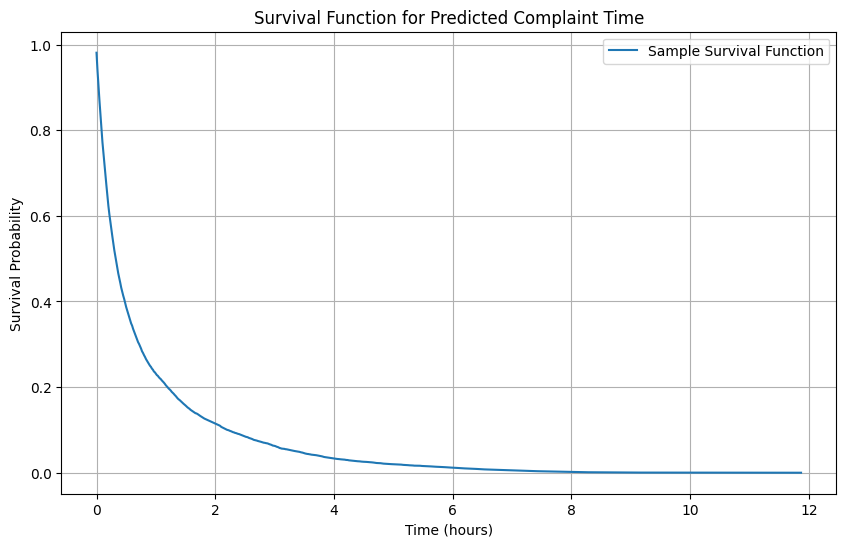

In [72]:
import matplotlib.pyplot as plt

# Plot the survival function
plt.figure(figsize=(10, 6))
plt.plot(survival_function.index, survival_function.values.T[0], label='Sample Survival Function')
plt.xlabel('Time (hours)')
plt.ylabel('Survival Probability')
plt.title('Survival Function for Predicted Complaint Time')
plt.legend()
plt.grid(True)
plt.show()


## LSTM neural network

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

# For data visualization and mapping
import folium
from folium.plugins import HeatMap

In [31]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta
from collections import defaultdict

# Base coordinates for sectors
location_coords = {
    "Sector A": (30.021, 31.450),
    "Sector B": (30.023, 31.455),
    "Sector C": (30.027, 31.460),
    "Sector D": (30.031, 31.465),
    "Sector E": (30.035, 31.470)
}

# Complaint types
complaint_types = ["Traffic", "Roads Issues", "Security", "Noise", "Cleaning", "Pets Control"]

# Time patterns for complaints with more realistic distributions
time_patterns = {
    "Traffic": {
        "morning": {"hours": (7, 9), "weight": 0.4},
        "evening": {"hours": (16, 19), "weight": 0.4},
        "other": {"hours": (10, 15), "weight": 0.2}
    },
    "Roads Issues": {
        "daytime": {"hours": (8, 17), "weight": 0.7},
        "other": {"hours": (17, 20), "weight": 0.3}
    },
    "Security": {
        "night": {"hours": (22, 5), "weight": 0.5},
        "evening": {"hours": (17, 21), "weight": 0.3},
        "other": {"hours": (6, 16), "weight": 0.2}
    },
    "Noise": {
        "evening": {"hours": (18, 23), "weight": 0.6},
        "night": {"hours": (23, 2), "weight": 0.3},
        "other": {"hours": (14, 17), "weight": 0.1}
    },
    "Cleaning": {
        "morning": {"hours": (6, 9), "weight": 0.5},
        "afternoon": {"hours": (13, 16), "weight": 0.3},
        "evening": {"hours": (17, 20), "weight": 0.2}
    },
    "Pets Control": {
        "morning": {"hours": (7, 11), "weight": 0.4},
        "evening": {"hours": (16, 19), "weight": 0.4},
        "other": {"hours": (12, 15), "weight": 0.2}
    }
}

# Enhanced sub-sector correlation with weights and urban context
sub_sector_correlation = {
    "Traffic": [
        ("Sector A", (30.0205, 30.0215), (31.4495, 31.4505), 0.4),  # Main road
        ("Sector B", (30.0225, 30.0235), (31.4545, 31.4555), 0.3),  # Commercial area
        ("Sector C", (30.0265, 30.0275), (31.4595, 31.4605), 0.3)   # School zone
    ],
    "Roads Issues": [
        ("Sector C", (30.0265, 30.0275), (31.4595, 31.4605), 0.5),  # Old infrastructure
        ("Sector A", (30.0205, 30.0215), (31.4495, 31.4505), 0.3),  # High traffic wear
        ("Sector D", (30.0305, 30.0315), (31.4645, 31.4655), 0.2)   # Construction zone
    ],
    "Security": [
        ("Sector D", (30.0305, 30.0315), (31.4645, 31.4655), 0.4),  # Commercial district
        ("Sector E", (30.0345, 30.0355), (31.4695, 31.4705), 0.4),  # Residential area
        ("Sector B", (30.0225, 30.0235), (31.4545, 31.4555), 0.2)   # Park area
    ],
    "Noise": [
        ("Sector C", (30.0265, 30.0275), (31.4595, 31.4605), 0.4),  # Entertainment zone
        ("Sector D", (30.0305, 30.0315), (31.4645, 31.4655), 0.3),  # Commercial area
        ("Sector B", (30.0225, 30.0235), (31.4545, 31.4555), 0.3)   # Restaurant district
    ],
    "Cleaning": [
        ("Sector A", (30.0205, 30.0215), (31.4495, 31.4505), 0.4),  # Market area
        ("Sector B", (30.0225, 30.0235), (31.4545, 31.4555), 0.3),  # Shopping district
        ("Sector E", (30.0345, 30.0355), (31.4695, 31.4705), 0.3)   # Public spaces
    ],
    "Pets Control": [
        ("Sector D", (30.0305, 30.0315), (31.4645, 31.4655), 0.5),  # Park zone
        ("Sector E", (30.0345, 30.0355), (31.4695, 31.4705), 0.3),  # Residential area
        ("Sector A", (30.0205, 30.0215), (31.4495, 31.4505), 0.2)   # Walking trails
    ]
}

def create_spatial_grid(sector_coords, grid_size=(32, 32)):
    """Create a grid mapping for each sector"""
    grid_mappings = {}
    for sector, (base_lat, base_long) in sector_coords.items():
        lat_min = base_lat - 0.002
        lat_max = base_lat + 0.002
        long_min = base_long - 0.002
        long_max = base_long + 0.002

        grid_mappings[sector] = {
            'lat_range': (lat_min, lat_max),
            'long_range': (long_min, long_max),
            'cell_size': ((lat_max - lat_min)/grid_size[0], 
                         (long_max - long_min)/grid_size[1])
        }
    return grid_mappings

def get_active_regions(complaint_points, grid_mapping, grid_size=(32, 32), radius=2):
    """Define active regions around complaint points"""
    active_grid = np.zeros(grid_size)

    for point in complaint_points:
        x, y = map_to_grid(point['lat'], point['long'], grid_mapping)

        # Mark surrounding cells as active with decay
        for dx in range(-radius, radius + 1):
            for dy in range(-radius, radius + 1):
                new_x = min(max(x + dx, 0), grid_size[0] - 1)
                new_y = min(max(y + dy, 0), grid_size[1] - 1)
                distance = np.sqrt(dx**2 + dy**2)
                influence = max(0, 1 - (distance / radius))
                active_grid[new_x, new_y] = max(active_grid[new_x, new_y], influence)

    return active_grid

def map_to_grid(lat, long, grid_mapping):
    """Map coordinates to grid cells"""
    lat_min = grid_mapping['lat_range'][0]
    long_min = grid_mapping['long_range'][0]
    cell_size = grid_mapping['cell_size']

    x = int((lat - lat_min) / cell_size[0])
    y = int((long - long_min) / cell_size[1])
    return x, y

def choose_sector_location(complaint_type):
    """Choose sector and location based on weighted probabilities"""
    sectors = sub_sector_correlation[complaint_type]
    sector, lat_range, long_range, weight = random.choices(
        sectors, 
        weights=[s[3] for s in sectors],
        k=1
    )[0]

    latitude = random.uniform(lat_range[0], lat_range[1])
    longitude = random.uniform(long_range[0], long_range[1])

    return sector, latitude, longitude

def get_complaint_time(complaint_type, date):
    """Generate realistic time for complaint based on weighted time patterns"""
    time_pattern = time_patterns[complaint_type]
    period = random.choices(
        list(time_pattern.keys()),
        weights=[p['weight'] for p in time_pattern.values()],
        k=1
    )[0]

    start_hour, end_hour = time_pattern[period]['hours']

    if start_hour < end_hour:
        hour = random.randint(start_hour, end_hour)
    else:  # Handle overnight periods
        hours = list(range(start_hour, 24)) + list(range(0, end_hour + 1))
        hour = random.choice(hours)

    minute = random.randint(0, 59)
    return date.replace(hour=hour, minute=minute)

def generate_balanced_data(num_complaint_records=10000, positive_negative_ratio=0.25):
    """Generate balanced dataset with enhanced spatial and temporal patterns"""
    grid_size = (32, 32)
    grid_mappings = create_spatial_grid(location_coords, grid_size)

    data = []
    start_date = datetime(2023, 1, 1)
    complaints_by_sector = defaultdict(list)

    # Generate complaint records
    for _ in range(num_complaint_records):
        complaint = random.choice(complaint_types)
        sector, latitude, longitude = choose_sector_location(complaint)

        complaint_date = start_date + timedelta(days=random.randint(0, 364))
        complaint_time = get_complaint_time(complaint, complaint_date)

        record = {
            "Date": complaint_time.date(),
            "Time": complaint_time.time(),
            "Complaint Type": complaint,
            "Location": sector,
            "Latitude": latitude,
            "Longitude": longitude,
            "Has_Complaint": 1
        }

        data.append(record)
        complaints_by_sector[sector].append({
            'lat': latitude,
            'long': longitude,
            'datetime': complaint_time
        })

    # Generate negative samples
    num_negative = int(num_complaint_records / positive_negative_ratio)
    for sector in location_coords.keys():
        sector_complaints = complaints_by_sector[sector]
        if not sector_complaints:
            continue

        active_regions = get_active_regions(sector_complaints, 
                                         grid_mappings[sector], 
                                         grid_size)

        sector_negative_count = int(len(sector_complaints) / positive_negative_ratio)

        for _ in range(sector_negative_count):
            while True:
                base_lat, base_long = location_coords[sector]
                latitude = random.uniform(base_lat - 0.002, base_lat + 0.002)
                longitude = random.uniform(base_long - 0.002, base_long + 0.002)

                x, y = map_to_grid(latitude, longitude, grid_mappings[sector])
                if active_regions[x, y] > 0:
                    break

            reference_complaint = random.choice(sector_complaints)
            time_offset = timedelta(minutes=random.randint(-120, 120))
            no_complaint_time = reference_complaint['datetime'] + time_offset

            data.append({
                "Date": no_complaint_time.date(),
                "Time": no_complaint_time.time(),
                "Complaint Type": "No Complaints",
                "Location": sector,
                "Latitude": latitude,
                "Longitude": longitude,
                "Has_Complaint": 0
            })

    # Shuffle and convert to DataFrame
    random.shuffle(data)
    return pd.DataFrame(data)

# Generate the balanced dataset
complaint_data = generate_balanced_data(num_complaint_records=10000, 
                                     positive_negative_ratio=0.25)
complaint_data.to_csv("data/convlstm_complaint_data.csv", index=False)

print("Data shape:", complaint_data.shape)
print("\nSample of records:")
print(complaint_data.head())
print("\nClass distribution:")
print(complaint_data['Has_Complaint'].value_counts(normalize=True))
print("\nComplaint type distribution:")
print(complaint_data[complaint_data['Has_Complaint']==1]['Complaint Type'].value_counts(normalize=True))

Data shape: (50000, 7)

Sample of records:
         Date      Time Complaint Type  Location   Latitude  Longitude  \
0  2023-04-17  22:53:00  No Complaints  Sector B  30.023042  31.455212   
1  2023-11-13  14:04:00  No Complaints  Sector E  30.034727  31.470615   
2  2023-05-31  06:18:00       Cleaning  Sector B  30.022633  31.455072   
3  2023-08-08  20:55:00  No Complaints  Sector B  30.023545  31.454959   
4  2023-11-04  23:27:00  No Complaints  Sector D  30.030915  31.464522   

   Has_Complaint  
0              0  
1              0  
2              1  
3              0  
4              0  

Class distribution:
Has_Complaint
0    0.8
1    0.2
Name: proportion, dtype: float64

Complaint type distribution:
Complaint Type
Security        0.1709
Pets Control    0.1672
Cleaning        0.1664
Noise           0.1655
Roads Issues    0.1650
Traffic         0.1650
Name: proportion, dtype: float64


In [32]:
# Load the dataset
# data = pd.read_csv('data/complaint_data.csv')
data = pd.read_csv('data/convlstm_complaint_data.csv')


# Display the first few rows
print(data.head())

         Date      Time Complaint Type  Location   Latitude  Longitude  \
0  2023-04-17  22:53:00  No Complaints  Sector B  30.023042  31.455212   
1  2023-11-13  14:04:00  No Complaints  Sector E  30.034727  31.470615   
2  2023-05-31  06:18:00       Cleaning  Sector B  30.022633  31.455072   
3  2023-08-08  20:55:00  No Complaints  Sector B  30.023545  31.454959   
4  2023-11-04  23:27:00  No Complaints  Sector D  30.030915  31.464522   

   Has_Complaint  
0              0  
1              0  
2              1  
3              0  
4              0  


In [33]:
# Convert 'Date' and 'Time' to datetime without specifying format
data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], errors='coerce')

# Sort data by datetime
data.sort_values('Datetime', inplace=True)

# Reset index
data.reset_index(drop=True, inplace=True)

# Check for missing values
print(data.isnull().sum())

Date              0
Time              0
Complaint Type    0
Location          0
Latitude          0
Longitude         0
Has_Complaint     0
Datetime          0
dtype: int64


### feature engineering

In [34]:
data = pd.read_csv('data/convlstm_complaint_data.csv')

# Parse Date and Time for feature extraction
data['Date'] = pd.to_datetime(data['Date'])
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S').dt.time
data['Hour'] = pd.to_datetime(data['Time'], format='%H:%M:%S').dt.hour
data['DayOfWeek'] = data['Date'].dt.dayofweek
data['Day'] = data['Date'].dt.day # Monday=0, Sunday=6
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year
data['IsWeekend'] = data['DayOfWeek'].isin([5,6]).astype(int)

# Cyclical encoding for 'Hour' and 'DayOfWeek'
data['Hour_Sin'] = np.sin(2 * np.pi * data['Hour']/24)
data['Hour_Cos'] = np.cos(2 * np.pi * data['Hour']/24)

data['DayOfWeek_Sin'] = np.sin(2 * np.pi * data['DayOfWeek']/7)
data['DayOfWeek_Cos'] = np.cos(2 * np.pi * data['DayOfWeek']/7)

In [ ]:
# # Define the spatial grid size
# GRID_SIZE = 0.001  # Adjust grid size as needed

# # Function to convert coordinates to grid indices
# def coords_to_grid(lat, lon, grid_size):
#   lat_index = np.floor(lat / grid_size).astype(int)
#   lon_index = np.floor(lon / grid_size).astype(int)
#   return lat_index, lon_index

# # Apply the function to get grid indices
# data['Lat_Index'], data['Lon_Index'] = coords_to_grid(data['Latitude'], data['Longitude'], GRID_SIZE)

In [35]:
def coords_to_grid(lat, lon, city_bounds, grid_size=(32, 32)):
    # Define city boundaries
    lat_min, lat_max = city_bounds['lat']
    lon_min, lon_max = city_bounds['lon']

    # Calculate cell sizes
    lat_cell_size = (lat_max - lat_min) / grid_size[0]
    lon_cell_size = (lon_max - lon_min) / grid_size[1]

    # Convert to grid indices
    lat_index = np.floor((lat - lat_min) / lat_cell_size).astype(int)
    lon_index = np.floor((lon - lon_min) / lon_cell_size).astype(int)

    # Ensure indices are within bounds
    lat_index = np.clip(lat_index, 0, grid_size[0] - 1)
    lon_index = np.clip(lon_index, 0, grid_size[1] - 1)

    return lat_index, lon_index

# Example usage:
city_bounds = {
    'lat': (30.021, 30.049),  # City's latitude bounds
    'lon': (31.450, 31.490)   # City's longitude bounds
}

# Apply to dataframe
data['Lat_Index'], data['Lon_Index'] = coords_to_grid(
    data['Latitude'], 
    data['Longitude'], 
    city_bounds
)

In [36]:
from sklearn.preprocessing import LabelEncoder

# Encode 'Complaint Type'
le_complaint = LabelEncoder()
data['Complaint_Type_Enc'] = le_complaint.fit_transform(data['Complaint Type'])

# Get number of complaint types
num_complaint_types = data['Complaint_Type_Enc'].nunique()

In [39]:
data.head()

,Date,Time,Complaint Type,Location,Latitude,Longitude,Has_Complaint,Hour,DayOfWeek,Day,Month,Year,IsWeekend,Hour_Sin,Hour_Cos,DayOfWeek_Sin,DayOfWeek_Cos,Lat_Index,Lon_Index,Complaint_Type_Enc
0,2023-04-17,22:53:00,No Complaints,Sector B,30.023042,31.455212,0,22,0,17,4,2023,0,-0.500000,8.660254e-01,0.000000,1.000000,2,4,1
1,2023-11-13,14:04:00,No Complaints,Sector E,30.034727,31.470615,0,14,0,13,11,2023,0,-0.500000,-8.660254e-01,0.000000,1.000000,15,16,1
2,2023-05-31,06:18:00,Cleaning,Sector B,30.022633,31.455072,1,6,2,31,5,2023,0,1.000000,6.123234e-17,0.974928,-0.222521,1,4,0
3,2023-08-08,20:55:00,No Complaints,Sector B,30.023545,31.454959,0,20,1,8,8,2023,0,-0.866025,5.000000e-01,0.781831,0.623490,2,3,1
4,2023-11-04,23:27:00,No Complaints,Sector D,30.030915,31.464522,0,23,5,4,11,2023,1,-0.258819,9.659258e-01,-0.974928,-0.222521,11,11,1


In [38]:
import torch

# Define sequence length and prediction horizon
SEQ_LEN = 24  # e.g., past 24 hours
PRED_HORIZON = 1  # Predict the next hour

# Get the unique grid cells
grid_cells = data.groupby(['Lat_Index', 'Lon_Index']).size().reset_index().rename(columns={0:'count'})

# Prepare a placeholder for sequences
sequences = []

# Iterate over each grid cell
for idx, row in grid_cells.iterrows():
  lat_idx = row['Lat_Index']
  lon_idx = row['Lon_Index']
  
  # Extract data for the grid cell
  cell_data = data[(data['Lat_Index'] == lat_idx) & (data['Lon_Index'] == lon_idx)]
  #cell_data = cell_data.sort_values('Datetime')
  cell_data = cell_data.sort_values('Date')


  # Create sequences
  for i in range(len(cell_data) - SEQ_LEN - PRED_HORIZON + 1):
      seq_input = cell_data.iloc[i:i+SEQ_LEN]
      seq_target = cell_data.iloc[i+SEQ_LEN:i+SEQ_LEN+PRED_HORIZON]
      
      # Prepare input features
      input_features = seq_input[['Hour_Sin', 'Hour_Cos', 'DayOfWeek_Sin', 'DayOfWeek_Cos', 'IsWeekend']].values
      input_features = torch.tensor(input_features, dtype=torch.float)
      
      # Prepare target variable (Complaint Types)
      target = seq_target['Complaint_Type_Enc'].values
      target = torch.tensor(target, dtype=torch.long)
      
      # Store the sequence and target along with grid indices
      sequences.append({
          'input': input_features, 
          'target': target, 
          'lat_idx': lat_idx, 
          'lon_idx': lon_idx
      })

2. Custom Dataset and DataLoader

In [74]:

from torch.utils.data import Dataset
class ComplaintDataset(Dataset):
  def __init__(self, sequences):
      self.sequences = sequences
      
  def __len__(self):
      return len(self.sequences)
  
  def __getitem__(self, idx):
      item = self.sequences[idx]
      return item['input'], item['target'], item['lat_idx'], item['lon_idx']

In [75]:
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader
# Split sequences into training and testing sets
train_sequences, test_sequences = train_test_split(sequences, test_size=0.2, random_state=42)

# Create Dataset objects
train_dataset = ComplaintDataset(train_sequences)
test_dataset = ComplaintDataset(test_sequences)

# Create DataLoaders
BATCH_SIZE = 64

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

3. Model Architecture

In [76]:
from torch import nn
class ConvLSTMCell(nn.Module):
  def __init__(self, input_dim, hidden_dim, kernel_size):
      super(ConvLSTMCell, self).__init__()
      
      padding = kernel_size // 2
      
      self.conv = nn.Conv2d(
          in_channels=input_dim + hidden_dim,
          out_channels=4 * hidden_dim,  # For input gate, forget gate, output gate, and cell candidate
          kernel_size=kernel_size,
          padding=padding
      )
      
      self.hidden_dim = hidden_dim
      
  def forward(self, input_tensor, cur_state):
      h_cur, c_cur = cur_state
      
      # Concatenate input and previous hidden state along channel dimension
      combined = torch.cat([input_tensor, h_cur], dim=1)
      
      # Convolution operation
      combined_conv = self.conv(combined)
      cc_i, cc_f, cc_o, cc_g = torch.split(combined_conv, self.hidden_dim, dim=1)
      
      # Gates and cell candidate
      i = torch.sigmoid(cc_i)
      f = torch.sigmoid(cc_f)
      o = torch.sigmoid(cc_o)
      g = torch.tanh(cc_g)
      
      # Update cell state and hidden state
      c_next = f * c_cur + i * g
      h_next = o * torch.tanh(c_next)
      
      return h_next, c_next
  
  def init_hidden(self, batch_size, spatial_dims):
      height, width = spatial_dims
      return (torch.zeros(batch_size, self.hidden_dim, height, width).to(device),
              torch.zeros(batch_size, self.hidden_dim, height, width).to(device))

In [77]:
class ConvLSTM(nn.Module):
  def __init__(self, input_dim, hidden_dims, kernel_size, num_classes):
      super(ConvLSTM, self).__init__()
      
      self.hidden_dims = hidden_dims
      self.num_layers = len(hidden_dims)
      
      cell_list = []
      for i in range(self.num_layers):
          cur_input_dim = input_dim if i == 0 else hidden_dims[i-1]
          cell_list.append(ConvLSTMCell(input_dim=cur_input_dim, hidden_dim=hidden_dims[i], kernel_size=kernel_size))
      
      self.cell_list = nn.ModuleList(cell_list)
      self.fc = nn.Linear(hidden_dims[-1], num_classes)
      
#   def forward(self, input_tensor):
#       # Input tensor shape: (batch_size, seq_len, channels, height, width)
#       batch_size, seq_len, channels, height, width = input_tensor.size()
      
#       # Initialize hidden and cell states
#       h, c = [], []
#       for i in range(self.num_layers):
#           h_i, c_i = self.cell_list[i].init_hidden(batch_size, (height, width))
#           h.append(h_i)
#           c.append(c_i)
      
#       # Iteratively process each time step
#       for t in range(seq_len):
#           x = input_tensor[:, t, :, :, :]
#           for i, cell in enumerate(self.cell_list):
#               h[i], c[i] = cell(x, (h[i], c[i]))
#               x = h[i]
      
#       # Global pooling and classification
#       x = h[-1]  # Take the last layer's output
#       x = x.view(batch_size, -1)
#       out = self.fc(x)
      
#       return out
  def forward(self, input_tensor):
      # Input tensor shape: (batch_size, seq_len, channels, height, width)
      batch_size, seq_len, channels, height, width = input_tensor.size()
      
      # Initialize hidden and cell states
      h, c = [], []
      for i in range(self.num_layers):
          h_i, c_i = self.cell_list[i].init_hidden(batch_size, (height, width))
          h.append(h_i)
          c.append(c_i)
      
      # Iteratively process each time step
      for t in range(seq_len):
          x = input_tensor[:, t, :, :, :]
          for i, cell in enumerate(self.cell_list):
              h[i], c[i] = cell(x, (h[i], c[i]))
              x = h[i]
      
      # Global pooling and classification
      x = h[-1]  # Take the last layer's output
      # Apply global average pooling over spatial dimensions
      x = x.mean(dim=[2, 3])  # Shape: (batch_size, hidden_dim)

      # Pass through the fully connected layer
      out = self.fc(x)
      return out

In [78]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Instantiate the model
INPUT_DIM = 1  # Number of input channels (e.g., 1 if we're using a single feature map)
HIDDEN_DIMS = [16, 32]  # Hidden dimensions for each ConvLSTM layer
KERNEL_SIZE = 3
NUM_CLASSES = num_complaint_types  # Number of complaint types

model = ConvLSTM(INPUT_DIM, HIDDEN_DIMS, KERNEL_SIZE, NUM_CLASSES).to(device)

4. Training the Model

In [79]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0009)

In [80]:
NUM_EPOCHS = 10

for epoch in range(NUM_EPOCHS):
  model.train()
  for inputs, targets, lat_idxs, lon_idxs in train_loader:
      # Move tensors to the configured device
      inputs = inputs.to(device)  # Shape: (batch_size, seq_len, features)
      targets = targets.to(device).squeeze()
      
      batch_size = inputs.size(0)
      
      # Reshape inputs for ConvLSTM: (batch_size, seq_len, channels, height, width)
      # For simplicity, we'll represent spatial dimensions as single pixels
      inputs = inputs.unsqueeze(2).unsqueeze(4)  # Adding channel and width dimensions
      inputs = inputs.permute(0, 1, 2, 4, 3)  # Adjust dimensions to (batch, seq, channels, height, width)
      
      # Forward pass
      outputs = model(inputs)
      
      # Compute loss
      loss = criterion(outputs, targets)
      
      # Backward and optimize
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
  
  print(f"Epoch [{epoch+1}/{NUM_EPOCHS}], Loss: {loss.item():.4f}")

Epoch [1/10], Loss: 0.5296
Epoch [2/10], Loss: 0.2482
Epoch [3/10], Loss: 0.6047
Epoch [4/10], Loss: 0.4540
Epoch [5/10], Loss: 0.0794
Epoch [6/10], Loss: 0.8863
Epoch [7/10], Loss: 0.5186
Epoch [8/10], Loss: 0.3826
Epoch [9/10], Loss: 0.5979


KeyboardInterrupt: 

In [84]:
import os
import torch

# Directory to save model checkpoints
save_dir = "model_checkpoints"
os.makedirs(save_dir, exist_ok=True)

NUM_EPOCHS = 10
best_eval_loss = float("inf")  # Initialize best evaluation loss as infinity

for epoch in range(NUM_EPOCHS):
    # Training phase
    model.train()
    train_loss = 0.0
    for inputs, targets, lat_idxs, lon_idxs in train_loader:
        # Your existing training code...
        inputs = inputs.to(device)
        targets = targets.to(device).squeeze()
        inputs = inputs.unsqueeze(2).unsqueeze(4)
        inputs = inputs.permute(0, 1, 2, 4, 3)
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        train_loss += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    avg_train_loss = train_loss / len(train_loader)
    
    # Evaluation phase
    model.eval()
    eval_loss = 0.0
    with torch.no_grad():
        for inputs, targets, lat_idxs, lon_idxs in test_loader:
            inputs = inputs.to(device)
            targets = targets.to(device).squeeze()
            inputs = inputs.unsqueeze(2).unsqueeze(4)
            inputs = inputs.permute(0, 1, 2, 4, 3)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            eval_loss += loss.item()
    
    avg_eval_loss = eval_loss / len(test_loader)
    
    print(f"Epoch [{epoch+1}/{NUM_EPOCHS}], Training Loss: {avg_train_loss:.4f}, Evaluation Loss: {avg_eval_loss:.4f}")

    # Save the model if evaluation loss improves
    if avg_eval_loss < best_eval_loss:
        best_eval_loss = avg_eval_loss
        checkpoint_path = os.path.join(save_dir, f"best_model_epoch_{epoch+1}.pth")
        torch.save(model.state_dict(), checkpoint_path)
        print(f"Model saved at {checkpoint_path} with Evaluation Loss: {best_eval_loss:.4f}")


Epoch [1/10], Training Loss: 0.4679, Evaluation Loss: 0.4705
Model saved at model_checkpoints\best_model_epoch_1.pth with Evaluation Loss: 0.4705
Epoch [2/10], Training Loss: 0.4679, Evaluation Loss: 0.4700
Model saved at model_checkpoints\best_model_epoch_2.pth with Evaluation Loss: 0.4700
Epoch [3/10], Training Loss: 0.4677, Evaluation Loss: 0.4706
Epoch [4/10], Training Loss: 0.4680, Evaluation Loss: 0.4713
Epoch [5/10], Training Loss: 0.4678, Evaluation Loss: 0.4709
Epoch [6/10], Training Loss: 0.4679, Evaluation Loss: 0.4705
Epoch [7/10], Training Loss: 0.4679, Evaluation Loss: 0.4716
Epoch [8/10], Training Loss: 0.4675, Evaluation Loss: 0.4700
Model saved at model_checkpoints\best_model_epoch_8.pth with Evaluation Loss: 0.4700
Epoch [9/10], Training Loss: 0.4659, Evaluation Loss: 0.4682
Model saved at model_checkpoints\best_model_epoch_9.pth with Evaluation Loss: 0.4682
Epoch [10/10], Training Loss: 0.4640, Evaluation Loss: 0.4669
Model saved at model_checkpoints\best_model_epoch

5. Evaluation

In [85]:
model.eval()
with torch.no_grad():
  total_correct = 0
  total_samples = 0
  
  for inputs, targets, lat_idxs, lon_idxs in test_loader:
      inputs = inputs.to(device)
      targets = targets.to(device).squeeze()
      
      batch_size = inputs.size(0)
      
      # Reshape inputs
      inputs = inputs.unsqueeze(2).unsqueeze(4)
      inputs = inputs.permute(0, 1, 2, 4, 3)
      
      outputs = model(inputs)
      _, predicted = torch.max(outputs.data, 1)
      total_samples += targets.size(0)
      total_correct += (predicted == targets).sum().item()
  
  accuracy = 100.0 * total_correct / total_samples
  print(f'Test Accuracy: {accuracy:.2f}%')

Test Accuracy: 90.85%


In [82]:
# Get unique locations from test data
locations = test_dataset.sequences[0]['lat_idx'], test_dataset.sequences[0]['lon_idx']

# Initialize a map centered around the city
city_center = [data['Latitude'].mean(), data['Longitude'].mean()]
m = folium.Map(location=city_center, zoom_start=12)

# Collect predictions and locations
model.eval()
with torch.no_grad():
  heat_map_data = []
  
  for inputs, targets, lat_idxs, lon_idxs in test_loader:
      inputs = inputs.to(device)
      
      batch_size = inputs.size(0)
      
      # Reshape inputs
      inputs = inputs.unsqueeze(2).unsqueeze(4)
      inputs = inputs.permute(0, 1, 2, 4, 3)
      
      outputs = model(inputs)
      probabilities = nn.functional.softmax(outputs, dim=1)
      predicted_prob, predicted_class = torch.max(probabilities, 1)
      
      # Collect data for heat map
      for i in range(batch_size):
          lat_idx = lat_idxs[i].item()
          lon_idx = lon_idxs[i].item()
          prob = predicted_prob[i].item()
          
          # Convert grid indices back to coordinates
          lat = (lat_idx + 0.5) * GRID_SIZE
          lon = (lon_idx + 0.5) * GRID_SIZE
          
          heat_map_data.append([lat, lon, prob])

# Create heat map layer
HeatMap(heat_map_data, radius=15).add_to(m)

# Save the map to an HTML file
m.save('heatmap.html')

In [83]:
def real_time_prediction(new_data):
  # Preprocess new data similar to training data
  # Extract features
  # Create input tensor
  # inputs: Tensor of shape (1, seq_len, channels, height, width)
  
  # For demonstration, let's assume 'inputs' is prepared
  
  inputs = new_data.to(device)
  
  # Model inference
  model.eval()
  with torch.no_grad():
      outputs = model(inputs)
      probabilities = nn.functional.softmax(outputs, dim=1)
      predicted_prob, predicted_class = torch.max(probabilities, 1)
      
  # Generate alert if probability exceeds threshold
  THRESHOLD = 0.8
  if predicted_prob.item() >= THRESHOLD:
      complaint_type = le_complaint.inverse_transform([predicted_class.item()])[0]
      print(f"Alert: High probability of '{complaint_type}' complaint at location.")
      
      # Additional code to send notifications or log the alert